In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

df = pd.read_excel (r'/Users/mariomorales/Documents/ITESO/TOG/datos1/datos_udg_admision.xlsx')

In [77]:
#Impresión del data frame
df.head()

,CENTRO,CARRERA,ASPIRANTES,ADMITIDOS,NO_ADMITIDOS,CUPO,PORCENTAJE_ADMISION,PUNTAJE_MINIMO,CALENDARIO,PROBABILIDAD
0,CUAAD,LICENCIATURA EN DISENO PARA LA COMUNICACION GR...,812,135,677,135,0.1663,160.0556,2,0
1,CUAAD,LICENCIATURA EN DISENO DE MODAS,166,40,126,40,0.2410,156.8356,2,0
2,CUAAD,LICENCIATURA EN DISENO DE INTERIORES Y AMBIENT...,434,60,374,60,0.1382,157.5622,2,0
3,CUAAD,LICENCIATURA EN URBANISTICA Y MEDIO AMBIENTE,88,50,38,50,0.5682,138.1111,2,1
4,CUAAD,LICENCIATURA EN ARQUITECTURA,1021,135,886,135,0.1322,167.4011,2,0


In [78]:
#Información sobre el Data Frame, comprobar que no hay datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CENTRO               1790 non-null   object 
 1   CARRERA              1790 non-null   object 
 2   ASPIRANTES           1790 non-null   int64  
 3   ADMITIDOS            1790 non-null   int64  
 4   NO_ADMITIDOS         1790 non-null   int64  
 5   CUPO                 1790 non-null   int64  
 6   PORCENTAJE_ADMISION  1790 non-null   float64
 7   PUNTAJE_MINIMO       1790 non-null   float64
 8   CALENDARIO           1790 non-null   int64  
 9   PROBABILIDAD         1790 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 140.0+ KB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROBABILIDAD', ylabel='count'>

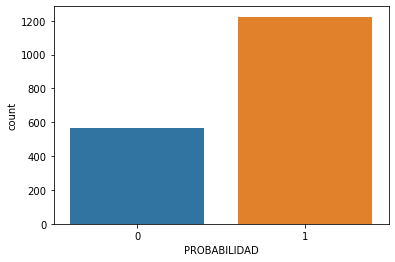

In [79]:
#Observamos las carreras con probabilidad alta de ingreso = 1 o carreras con porcentaje de admisión
#por encima del 38%, y carreras con probabilidad baja de ingreso = 0, o que tengan un porcentaje de admisión
#por debajo del 38%
sns.countplot(df['PROBABILIDAD'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CALENDARIO', ylabel='count'>

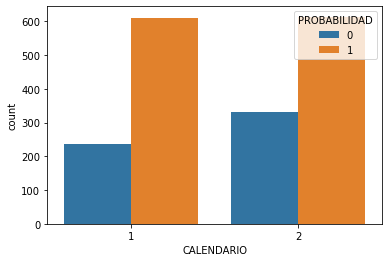

In [80]:
#Observamos qué calendario tiene mayor dificultad de ingreso. En este caso se confirma que el calendario B(2) es
#el calendario con mayor dificultad de ingreso, pues las carreras con probabilidad baja(0) son mayores que en el
#calendario A(1)
sns.countplot(df['CALENDARIO'],hue=df['PROBABILIDAD'])

In [81]:
#Se establecen las variables independientes (x) y dependientes o target (y)
feature_cols = ['CALENDARIO','PUNTAJE_MINIMO','PORCENTAJE_ADMISION','CUPO','ADMITIDOS','ASPIRANTES']
X = df[feature_cols]
y = df.PROBABILIDAD

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [83]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


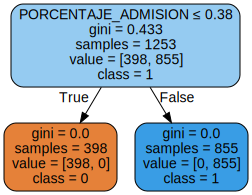

In [85]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None,
                    feature_names = feature_cols,
                    class_names=['0','1'],
                    filled=True, rounded=True,
                    special_characters=True)

graph = graphviz.Source(dot_data)  
graph